In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_circles

In [2]:
x,y =make_circles(n_samples=250,noise=0.1,random_state=1)

In [3]:
x

array([[-0.97698857, -0.30178692],
       [ 0.92636516,  0.15651472],
       [ 0.24286325, -0.55184594],
       [-0.02643412,  0.81110656],
       [-0.25771709, -0.90412689],
       [ 0.19058117, -0.83269737],
       [-1.09753269,  0.27932451],
       [ 0.63420333, -0.63860029],
       [-0.69176356,  0.1800655 ],
       [ 1.06004116,  0.20436671],
       [ 0.7175285 , -0.32327352],
       [-0.71285874,  0.05493709],
       [ 0.95235178, -0.42334565],
       [-0.76184002,  0.28019957],
       [ 0.81921027,  0.14854451],
       [-0.74254735, -0.94613375],
       [-0.68376901,  0.35871641],
       [-0.7933916 ,  0.53637882],
       [ 0.19836264,  0.9653627 ],
       [-0.86218248, -0.61582507],
       [ 0.19550415, -0.8605479 ],
       [-0.11291037,  0.96079731],
       [ 0.11231165, -1.01549704],
       [-0.6990936 ,  0.08161483],
       [ 1.18765313, -0.43832598],
       [ 0.89017288, -0.20689289],
       [ 1.03671661, -0.18463146],
       [ 0.68516248, -0.44277113],
       [-0.19967383,

In [4]:
y

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0])

In [5]:
import seaborn as sns

Building Neural Network

In [6]:
model = Sequential()
model.add(Dense(10,activation="sigmoid",input_dim=2))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.get_weights()

[array([[ 0.38727623,  0.3854608 ,  0.05457968,  0.35848898,  0.06123686,
          0.22499269, -0.325668  , -0.0560863 ,  0.14331377, -0.35199496],
        [-0.6078912 ,  0.39347726,  0.6387616 , -0.17558849,  0.0811013 ,
          0.51168925, -0.44634372,  0.52598757, -0.6463878 , -0.3685199 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.32997996],
        [ 0.6950217 ],
        [ 0.02365476],
        [ 0.30112725],
        [-0.1690045 ],
        [-0.7251363 ],
        [ 0.54237086],
        [-0.71239364],
        [ 0.7238558 ],
        [ 0.37001473]], dtype=float32),
 array([0.], dtype=float32)]

In [8]:
initial_weights = model.get_weights()

In [9]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [10]:
model.set_weights(initial_weights)

In [11]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [12]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [13]:
history = model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 3s 95ms/step - loss: 0.6934 - accuracy: 0.4350 - val_loss: 0.6936 - val_accuracy: 0.4400
Epoch 2/100
7/7 [==============================] - 0s 24ms/step - loss: 0.6930 - accuracy: 0.5150 - val_loss: 0.6940 - val_accuracy: 0.4400
Epoch 3/100
7/7 [==============================] - 0s 24ms/step - loss: 0.6929 - accuracy: 0.5150 - val_loss: 0.6949 - val_accuracy: 0.4400
Epoch 4/100
7/7 [==============================] - 0s 29ms/step - loss: 0.6929 - accuracy: 0.5150 - val_loss: 0.6957 - val_accuracy: 0.4400
Epoch 5/100
7/7 [==============================] - 0s 23ms/step - loss: 0.6928 - accuracy: 0.5150 - val_loss: 0.6959 - val_accuracy: 0.4400
Epoch 6/100
7/7 [==============================] - 0s 24ms/step - loss: 0.6927 - accuracy: 0.5150 - val_loss: 0.6957 - val_accuracy: 0.4400
Epoch 7/100
7/7 [==============================] - 0s 28ms/step - loss: 0.6929 - accuracy: 0.5150 - val_loss: 0.6954 - val_accuracy: 0.4400
Epoch 8/100
7/7 [===

In [14]:
model.get_weights()

[array([[ 0.17076525,  0.17076525,  0.17076527,  0.17076527,  0.17076525,
          0.17076525,  0.17076528,  0.17076528,  0.17076525,  0.17076525],
        [-0.05098249, -0.05098249, -0.05098248, -0.05098248, -0.05098249,
         -0.05098249, -0.0509825 , -0.0509825 , -0.05098249, -0.05098249]],
       dtype=float32),
 array([-0.013582  , -0.013582  , -0.013582  , -0.013582  , -0.01358199,
        -0.01358199, -0.013582  , -0.013582  , -0.013582  , -0.013582  ],
       dtype=float32),
 array([[-0.01301414],
        [-0.01301414],
        [-0.01301414],
        [-0.01301414],
        [-0.01301414],
        [-0.01301414],
        [-0.01301415],
        [-0.01301415],
        [-0.01301414],
        [-0.01301414]], dtype=float32),
 array([-0.00804812], dtype=float32)]

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

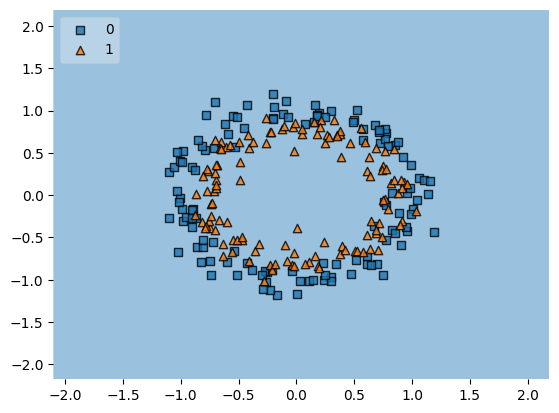

In [15]:
plot_decision_regions(x,y.astype('int'),clf=model,legend=2)

# Non_zero _Weight_initialization

In [16]:
import numpy as np

In [17]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [18]:
model.set_weights(initial_weights)

In [19]:
model.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [20]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [21]:
history = model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 1s 32ms/step - loss: 1.8649 - accuracy: 0.4850 - val_loss: 1.5657 - val_accuracy: 0.5600
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 1.8379 - accuracy: 0.4850 - val_loss: 1.5425 - val_accuracy: 0.5600
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 1.8103 - accuracy: 0.4850 - val_loss: 1.5201 - val_accuracy: 0.5600
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 1.7826 - accuracy: 0.4850 - val_loss: 1.4979 - val_accuracy: 0.5600
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 1.7573 - accuracy: 0.4850 - val_loss: 1.4754 - val_accuracy: 0.5600
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 1.7306 - accuracy: 0.4850 - val_loss: 1.4535 - val_accuracy: 0.5600
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 1.7048 - accuracy: 0.4850 - val_loss: 1.4329 - val_accuracy: 0.5600
Epoch 8/100
7/7 [======

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

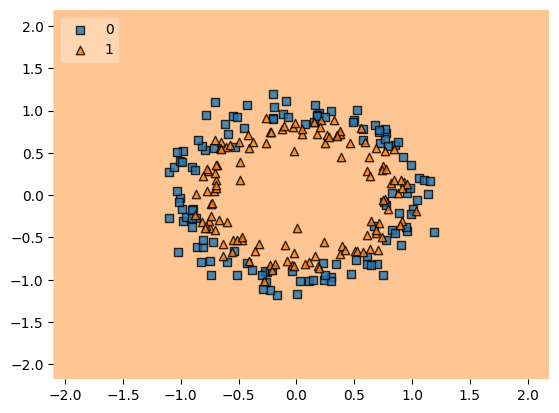

In [22]:
plot_decision_regions(x,y.astype('int'),clf=model,legend=2)

<!-- He_initialization -->

# He_initialization

In [44]:
model = Sequential()
model.add(Dense(10,activation="relu",input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation="relu",kernel_initializer='he_normal'))
model.add(Dense(10,activation="relu",kernel_initializer='he_normal'))
model.add(Dense(10,activation="relu",kernel_initializer='he_normal'))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                30        
                                                                 
 dense_27 (Dense)            (None, 10)                110       
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
 dense_30 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [46]:
initial_weights = model.get_weights()

In [48]:
initial_weights[0]= np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1]= np.zeros(model.get_weights()[1].shape)
initial_weights[2]= np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3]= np.zeros(model.get_weights()[3].shape)
initial_weights[4]= np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5]= np.zeros(model.get_weights()[5].shape)
initial_weights[6]= np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7]= np.zeros(model.get_weights()[7].shape)
initial_weights[8]= np.zeros(model.get_weights()[8].shape)
initial_weights[9]= np.zeros(model.get_weights()[1].shape)


In [49]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [50]:
history = model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 2s 33ms/step - loss: 0.6917 - accuracy: 0.5150 - val_loss: 0.7013 - val_accuracy: 0.5000
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6883 - accuracy: 0.5250 - val_loss: 0.7003 - val_accuracy: 0.4400
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6857 - accuracy: 0.5350 - val_loss: 0.7006 - val_accuracy: 0.4600
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6843 - accuracy: 0.5350 - val_loss: 0.7001 - val_accuracy: 0.4600
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6824 - accuracy: 0.5350 - val_loss: 0.7008 - val_accuracy: 0.4600
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6813 - accuracy: 0.5350 - val_loss: 0.7000 - val_accuracy: 0.4800
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6798 - accuracy: 0.5250 - val_loss: 0.7006 - val_accuracy: 0.4800
Epoch 8/100
7/7 [===